# Harris Corner Detection

### Import resources and display image

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline


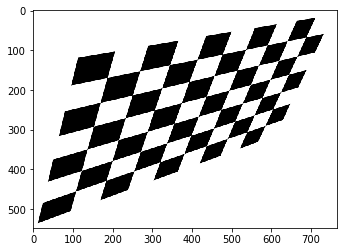

In [100]:
# read the image

image = cv2.imread('images/board.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# make a copy of the image


image_copy = np.copy(image)

plt.imshow(image_copy)
plt.show()

### Detect corners

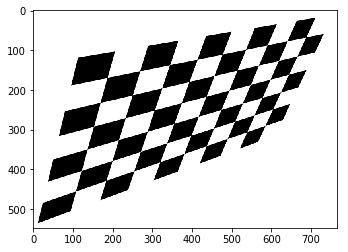

In [101]:
# convert to gray scale
gray= cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
plt.imshow(gray,cmap='gray')
plt.show()

In [102]:
gray.dtype

dtype('float32')

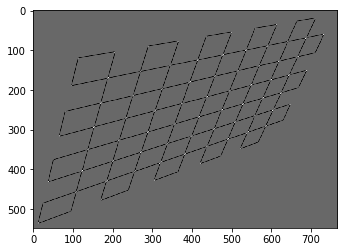

In [103]:
# Detect corners - use sobel kernels 2 means 2 by 2 pixels , sobel kernel operator 3, constant value 0.04 is typical.. 
# smaller value of this constant will result in more corners
dst = cv2.cornerHarris(gray,2, 5,0.04) # this result in image with bright points as corners and non-corners as non-bright points


plt.imshow(dst,cmap='gray')
plt.show()


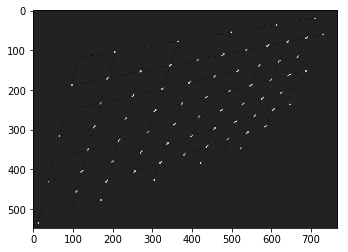

In [104]:

dst = cv2.dilate(dst,None)
plt.imshow(dst,cmap='gray')
plt.show()


### Extract and display strong corners

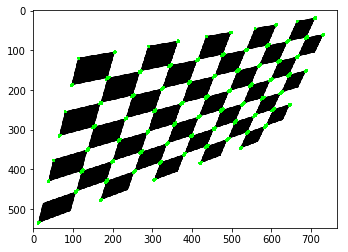

In [105]:
# define a threshold for extracting strong corners
threshold = 0.01*dst.max()


# create an image copy to draw corners on
corner_image = np.copy(image_copy)

# iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0,dst.shape[1]):
        if(dst[j,i] > threshold):
            # image, center pt, radius , color, thickness
            cv2.circle(corner_image,(i,j),1,(0,255,0),2)
plt.imshow(corner_image)

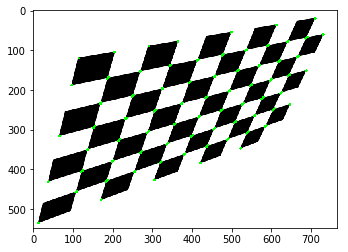

In [106]:
## TODO: Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller ans see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)